<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/Random_Forest_Regression_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Random Forest Regression for House Price Prediction**

## **Objective**  
Train and evaluate a **Random Forest Regression model** to predict house prices based on various features such as area, number of bedrooms, population, etc.

---

## **Dataset**  
Download the **USA Housing Price dataset** from Kaggle:  
🔗 [USA Housing Price Dataset](https://www.kaggle.com/datasets/gpandi007/usa-housing-dataset)  

- Load the dataset into a Pandas DataFrame.  
- Display the first few rows to understand the structure.  

---

## **Tasks**  

### **1. Data Preprocessing**  
- Drop irrelevant columns such as "Address" (if applicable).  
- Check and handle missing values.  
- Normalize numerical features using **StandardScaler**.  
- Split the dataset into **80% training and 20% testing**.  

---

### **2. Train Random Forest Regression Model**  
- Train a **Random Forest Regressor** with default parameters.  
- Evaluate its initial performance.  

---

### **3. Hyperparameter Tuning**  
- Use **GridSearchCV** to tune the following hyperparameters:  
  - `n_estimators` (Number of trees in the forest)  
  - `max_depth` (Maximum depth of each tree)  
  - `min_samples_split` (Minimum samples required to split a node)  
  - `min_samples_leaf` (Minimum samples required at a leaf node)  

---

### **4. Model Evaluation**  
- Compute and print the following metrics for both the **default** and **tuned** models:  
  - **Mean Squared Error (MSE)**  
  - **Mean Absolute Error (MAE)**  
  - **R² Score**  

---

### **5. Visualization**  
- Plot **Actual vs. Predicted values** for the Random Forest model.  
- Plot a **feature importance graph** to analyze which features contribute the most to house price prediction.  

---

## **Submission Guidelines**  
- Submit a **colab Notebook (.ipynb)** with code and visualizations.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Step 1: Load the datasets
train_df = pd.read_csv('/content/housing_train.csv')
test_df = pd.read_csv('/content/housing_test.csv')

In [3]:
# Display basic info
print("Training Dataset Info:")
print(train_df.info())
print("\nTest Dataset Info:")
print(test_df.info())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null 

In [4]:
print(train_df.columns.tolist())
print(train_df.shape)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

**Step 2: Data Preprocessing**

In [5]:
# Dropping address-like columns
address_related_cols = ['Id','Street', 'Alley', 'Neighborhood', 'Condition1', 'Condition2']
train_df = train_df.drop(address_related_cols, axis=1)
test_df = test_df.drop(address_related_cols, axis=1)

In [6]:
# Check for missing values
print("\nMissing values in training set:")
print(train_df.isnull().sum())
print("\nMissing values in test set:")
print(test_df.isnull().sum())


Missing values in training set:
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

Missing values in test set:
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
LotShape           0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 74, dtype: int64


**Handling Missing Values**

In [7]:
# Fill numerical columns (same as before)
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())

# For test_df, exclude 'SalePrice' if it doesn't exist
test_num_cols = [col for col in num_cols if col in test_df.columns]
test_df[test_num_cols] = test_df[test_num_cols].fillna(test_df[test_num_cols].median())

# Fill categorical columns (with safety check for all-NaN columns)
cat_cols = train_df.select_dtypes(include=['object']).columns

for col in cat_cols:
    # For train_df
    mode_train = train_df[col].mode()
    train_df[col] = train_df[col].fillna(mode_train.iloc[0] if not mode_train.empty else "Missing")

    # For test_df (if column exists)
    if col in test_df.columns:
        mode_test = test_df[col].mode()
        test_df[col] = test_df[col].fillna(mode_test.iloc[0] if not mode_test.empty else "Missing")

# Verify no missing values remain
print("Missing values after imputation:")
print("Train:", train_df.isnull().sum().sum(), "| Test:", test_df.isnull().sum().sum())

Missing values after imputation:
Train: 0 | Test: 0


In [8]:
num_rows = len(train_df)  # For training set
print("Number of rows in train_df:", num_rows)

num_rows_test = len(test_df)  # For test set
print("Number of rows in test_df:", num_rows_test)

Number of rows in train_df: 1460
Number of rows in test_df: 1459


In [9]:
train_df.shape

(1460, 75)

In [10]:
# Separate features and target
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']
X_test = test_df

In [11]:
# Get numerical columns (excluding the target)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train[numerical_cols])
X_test_preprocessed = preprocessor.transform(X_test[numerical_cols])

# Convert back to DataFrames for easier handling
X_train_processed = pd.DataFrame(X_train_preprocessed, columns=numerical_cols, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_preprocessed, columns=numerical_cols, index=X_test.index)

# Step 3: Train initial Random Forest model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_processed, y_train)
y_pred = rf_reg.predict(X_test_processed)

# Since we don't have y_test, we can't evaluate on test set
print("\nModel Training Complete. Ready to make predictions on test set.")


Model Training Complete. Ready to make predictions on test set.


**Hyper Parameter Tuning**

In [13]:
# Step 4: Hyperparameter tuning (using training data only)
param_grid = {
    'n_estimators': [100, 200],  # Reduced from 3 to 2
    'max_depth': [None, 10],      # Reduced from 4 to 2
    'min_samples_split': [2, 5],  # Reduced from 3 to 2
    'min_samples_leaf': [1, 2]    # Reduced from 3 to 2
}
# Now only 2×2×2×2 = 16 combinations × 5 folds = 80 fits (vs original 540)

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("\nStarting Grid Search...")
grid_search.fit(X_train_processed, y_train)

# Get best model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test_processed)

# Can only show training performance since we don't have y_test
print("\nTuned Model Training Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print("Note: Final evaluation requires test set labels which are not available")



Starting Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Tuned Model Training Performance:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Note: Final evaluation requires test set labels which are not available


**Step 5: Visualization (using training data for visualization)**

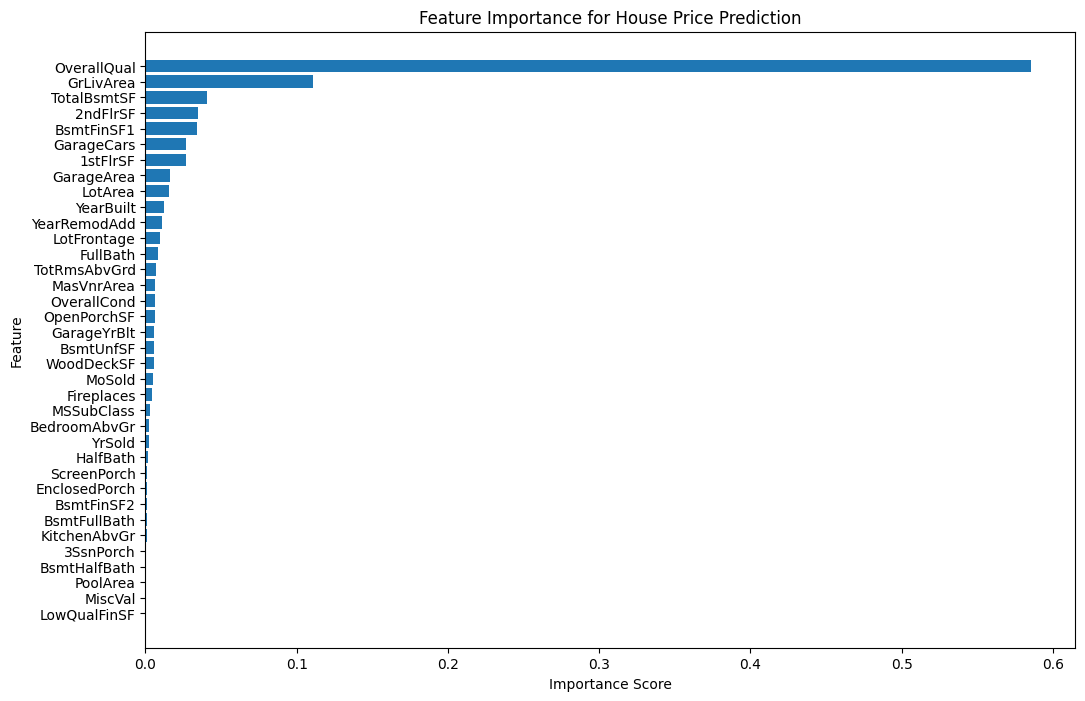

In [17]:
# Plot feature importance only (since we can't plot actual vs predicted without y_test)
feature_importance = pd.DataFrame({
    'Feature': numerical_cols,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance for House Price Prediction')
plt.gca().invert_yaxis()
plt.show()

In [21]:
# Step 6: Make sample predictions
sample_idx = 0
sample_house = X_test.iloc[sample_idx:sample_idx+1]
sample_house_processed = preprocessor.transform(sample_house[numerical_cols])
sample_pred = best_rf.predict(sample_house_processed)

print("\nSample Prediction:")
print("House Features:")
print(sample_house)
print(f"\nPredicted Price: ${sample_pred[0]:.2f}")


Sample Prediction:
House Features:
   MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour Utilities  \
0          20       RH         80.0    11622      Reg         Lvl    AllPub   

  LotConfig LandSlope BldgType  ... ScreenPorch  PoolArea  PoolQC  Fence  \
0    Inside       Gtl     1Fam  ...         120         0      Ex  MnPrv   

   MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  
0         Shed       0      6   2010       WD        Normal  

[1 rows x 74 columns]

Predicted Price: $128070.50
